In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

In [3]:
df=pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [31]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [40]:
df=df.dropna()

In [43]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

1.Untuk feature/column Landsize & Price, hitung dan beri penjelasan (insight) terkait:

* Titik Pusat Data (Central Tendency)
* Persebaran Data (Dispersion)
* Distribusi Data (Distribution)

In [44]:
df.mean()
#Mean is the average value of the dataset.
#Mean is calculated by adding all values in the dataset divided by the number of values in the dataset.
#We can calculate the mean for only numerical variables

Rooms            2.931407e+00
Price            1.068828e+06
Distance         9.751097e+00
Postcode         3.101948e+03
Bedroom2         2.902034e+00
Bathroom         1.576340e+00
Car              1.573596e+00
Landsize         4.710069e+02
BuildingArea     1.415686e+02
YearBuilt        1.964082e+03
Lattitude       -3.780790e+01
Longtitude       1.449902e+02
Propertycount    7.435490e+03
dtype: float64

In [45]:
df.mode()
#The mode is used to find the common number in the dataset.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Reservoir,1/1 Clarendon St,3.0,h,600000.0,S,Nelson,27/05/2017,11.2,3121.0,...,1.0,1.0,0.0,120.0,1970.0,Moreland,-37.8424,145.0104,Southern Metropolitan,21650.0
1,NaN,36 Aberfeldie St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-37.7634,145.0243,NaN,NaN


In [46]:
df.median()
#The Median is the middle number in the dataset.
#Median is the best measure when we have outliers.

Rooms                 3.00000
Price            880000.00000
Distance              9.00000
Postcode           3081.00000
Bedroom2              3.00000
Bathroom              1.00000
Car                   1.00000
Landsize            373.00000
BuildingArea        124.00000
YearBuilt          1970.00000
Lattitude           -37.80225
Longtitude          144.99580
Propertycount      6567.00000
dtype: float64

## Dispersion

* The measure of spread/dispersion is used to describe how data is spread. It also describes the variability of the dataset.

* Standard Deviation, Variance, Range, IQR, are used to describe the measure of spread/dispersion

* The measure of spread can be shown in graphs like boxplot.

In [47]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


1.Variance:

Variance is used to describe how far each number in the dataset is from the mean.

In [48]:
print('Var Price=',df['Price'].var())
print('Var Distance=',df['Distance'].var())
print('Var Rooms=',df['Rooms'].var())

Var Price= 455836201596.7061
Var Distance= 31.49527724570153
Var Rooms= 0.9429940480749625


2.Standard Deviation

* Standard Deviation is the measure of the spread of data from the mean.

* Standard deviation is the square root of variance.

* More the standard deviation, more the spread.

In [49]:
print('std Price=',df['Price'].std())
#standard deviation untuk price cukup besar karena meanya 1jt dan std utk price 639310
print('std Distance=',df['Distance'].std())
print('std Rooms=',df['Rooms'].std())

std Price= 675156.4275015873
std Distance= 5.612065327996595
std Rooms= 0.9710788063154104


In [50]:
df.std()

Rooms                 0.971079
Price            675156.427502
Distance              5.612065
Postcode             86.421604
Bedroom2              0.970055
Bathroom              0.711362
Car                   0.929947
Landsize            897.449881
BuildingArea         90.834824
YearBuilt            38.105673
Lattitude             0.075850
Longtitude            0.099165
Propertycount      4337.698917
dtype: float64

3. Boxplot

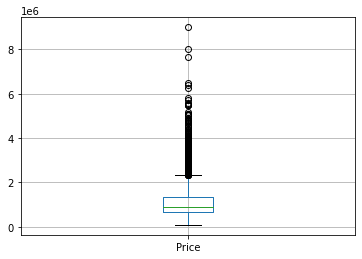

In [7]:
df.boxplot(column="Price")
plt.savefig('boxplotPrice.png')
#banyak outliers

## Distribution

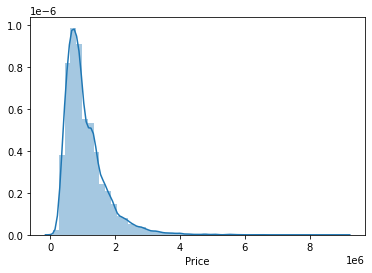

In [8]:
sns.distplot(df['Price'])
plt.savefig('Skewness.png')
#positive skewness untuk price

In [53]:
 stats.skew(df['Price'])#normal distribution has skewness=0

2.4747899470275407

In [57]:
stats.skewtest(df['Price']) #the null hypothesis is that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution, therefore p value < 0.05, reject H null, or the skewness is assumed to be not normal

SkewtestResult(statistic=48.068467046145855, pvalue=0.0)

In [54]:
stats.kurtosis(df['Price'],fisher=False) #normal distribution has kurtosis = 3
#fischer= True (default), maka nilai output adalah nilai excess kurtosis

15.222489306888262

In [56]:
stats.kurtosistest(df['Price']) #the null hypothesis is that the kurtosis of the population that the sample was drawn from is the same as that of a corresponding normal distribution, therefore p value < 0.05, reject H null, or the skewness is assumed to be not normal

KurtosistestResult(statistic=34.81096658594283, pvalue=1.65997904241914e-265)

2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Distance ! Tambahkan plot untuk menampilkan adanya data outlier!



In [64]:
Distance=df['Distance']

In [65]:
Q1 = np.percentile(Distance, 25, interpolation= 'midpoint')
Q2 = np.percentile(Distance, 50, interpolation= 'midpoint')
Q3 = np.percentile(Distance, 75, interpolation= 'midpoint')

print('Q1 25 percentile of the given data is',Q1)
print('Q2 50 percentile of the given data is',Q2)
print('Q3 75 percentile of the given data is',Q3)

IQR = Q3-Q1
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is 5.9
Q2 50 percentile of the given data is 9.0
Q3 75 percentile of the given data is 12.4
Interquartile range is 6.5


In [66]:
low_lim = Q1 - 1.5*IQR
up_lim= Q3 + 1.5*IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)

low_limit is -3.8499999999999996
up_limit is 22.15


In [67]:
outlier =[]
for x in Distance:
    if ((x> up_lim) or (x<low_lim)):
        outlier.append(x)
print(' outlier in the dataset is',outlier)

 outlier in the dataset is [23.2, 23.0, 23.0, 24.7, 25.9, 36.9, 38.0, 45.9, 45.2, 25.2, 31.7, 31.7, 25.9, 23.5, 35.4, 31.7, 31.7, 27.2, 23.2, 23.2, 23.2, 27.0, 25.0, 25.0, 31.2, 31.2, 27.0, 24.7, 24.7, 24.7, 22.2, 28.8, 38.0, 36.9, 25.2, 29.8, 31.7, 26.5, 26.5, 35.4, 31.7, 23.2, 23.2, 23.2, 35.2, 34.9, 23.0, 22.2, 24.8, 45.9, 32.3, 31.7, 26.5, 23.5, 34.7, 31.7, 39.8, 35.2, 27.0, 23.0, 22.2, 22.2, 38.0, 31.7, 31.6, 22.7, 47.4, 23.5, 34.7, 23.2, 35.2, 34.9, 27.1, 23.0, 23.0, 23.0, 22.2, 27.0, 27.0, 24.8, 25.2, 23.3, 31.7, 29.8, 31.7, 22.7, 22.7, 22.7, 35.4, 31.7, 25.5, 23.2, 35.2, 35.2, 25.0, 25.0, 34.9, 23.0, 23.0, 23.0, 23.0, 24.7, 22.2, 27.0, 24.8, 38.0, 38.0, 33.3, 31.7, 31.7, 28.8, 26.5, 23.5, 23.5, 35.4, 31.7, 31.7, 27.0, 27.2, 34.9, 23.0, 23.0, 27.7, 45.9, 26.1, 31.7, 31.7, 25.9, 22.2, 27.2, 23.2, 25.0, 25.0, 31.2, 34.9, 23.0, 22.2, 22.2, 22.2, 28.5, 24.8, 24.8, 38.0, 38.0, 45.9, 25.2, 29.8, 29.8, 34.1, 47.3, 23.5, 23.5, 35.4, 35.4, 35.4, 25.5, 39.0, 27.0, 24.7, 24.7, 28.8, 27.0, 

In [73]:
def outlier_iqr(Distance):
    anomali=[]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1
    batas = IQR * 1.5

    batas_b = q1 - batas
    batas_a = q3 + batas
    print('batas bawah adalah',batas_b)
    print('batas atas adalah',batas_a)

    for outlier in data:
        if outlier > batas_a or outlier < batas_b:
            anomali.append(outlier)
    return anomali


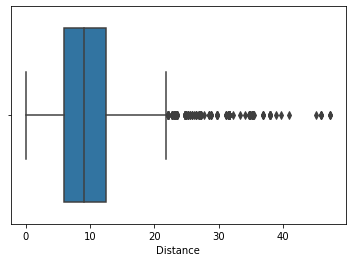

In [68]:
sns.boxplot(Distance)
plt.show()

In [ ]:
3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

In [80]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


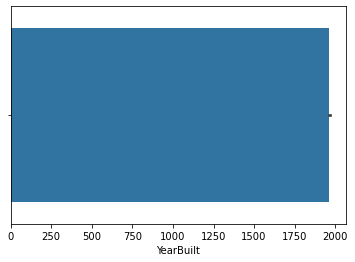

In [97]:

ax = sns.barplot(x="YearBuilt", data=df)

4. Tampilkan perkembangan rata-rata harga (Price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

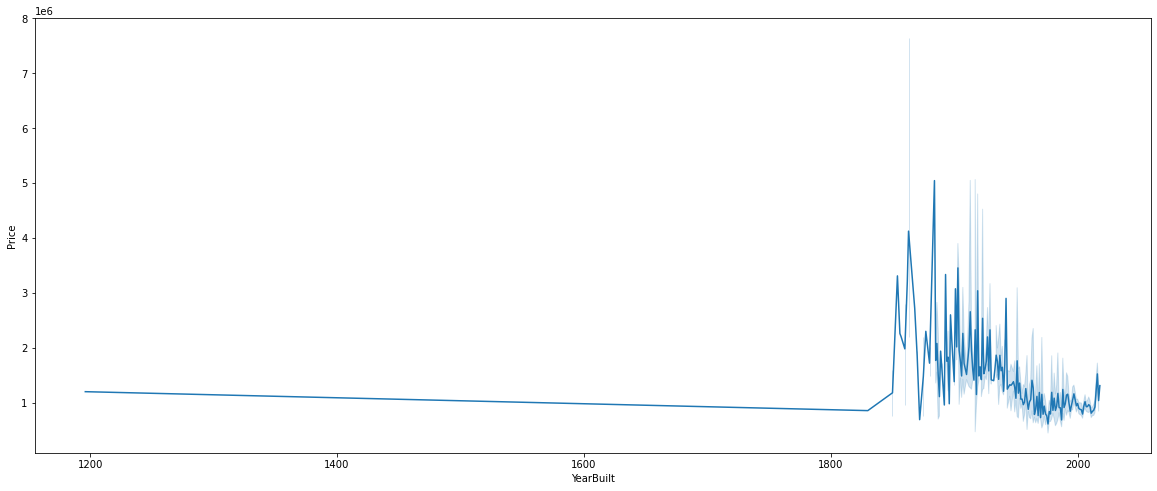

In [9]:
plt.figure(figsize=(20,8))
sns.lineplot(x='YearBuilt',y='Price',data=df)
plt.savefig('lineplot.png')

5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

Kalau nilai koefisien:  
* +/- 0.8-1 = Korelasi sangat kuat
* +/- 0.6-0.8= Korelasi moderat
* +/- 0.4-0.6 = Korelasi lemah
* +/- 0-0.4 = Tidak ada korelasi

In [108]:
 stats.skew(df['Landsize'])#normal distribution has skewness=0

18.834378556740738

In [109]:
 stats.skew(df['Distance'])#normal distribution has skewness=0

1.7644126642313827

In [110]:
 stats.skew(df['Rooms'])#normal distribution has skewness=0

0.331977760915951

In [106]:
df[['Landsize','Distance','Rooms']].corr(method='spearman')
#pake spearman karena distribusi tidak normal
#Rooms and Landsize korelasi lemah
#Distance and landsize korelasi lemah
#Rooms and Distance tidak ada korelasi

,Landsize,Distance,Rooms
Landsize,1.000000,0.408084,0.522214
Distance,0.408084,1.000000,0.336033
Rooms,0.522214,0.336033,1.000000


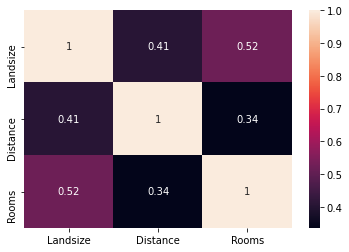

In [112]:
heatmap=df[['Landsize','Distance','Rooms']].corr(method='spearman')
sns.heatmap(heatmap,annot=True)

6. Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah:

* Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!

* Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!

* Metode penjualan properti (Method) yang paling sering dilakukan!

In [114]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [132]:
df.groupby('Regionname').mean()['Price'].sort_values(ascending=False).head(1)

Regionname
Southern Metropolitan    1.378654e+06
Name: Price, dtype: float64

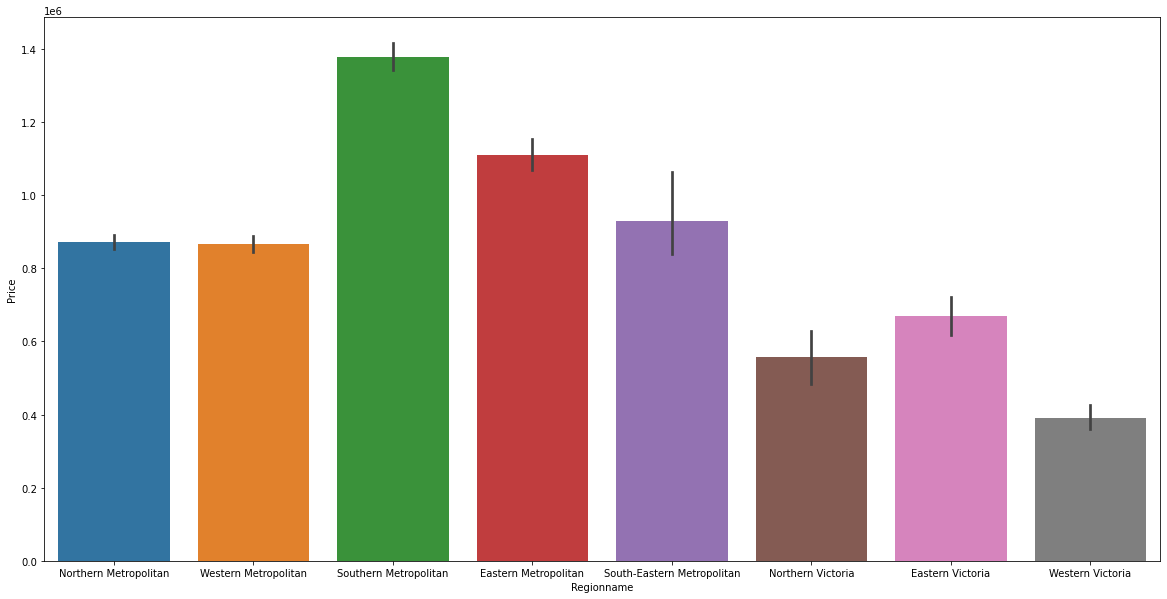

In [140]:
plt.figure(figsize=(20,10))
sns.barplot(x='Regionname',y='Price',data=df)

Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!

In [144]:
df.groupby('CouncilArea').mean()['Price'].sort_values(ascending=False).head()

CouncilArea
Boroondara     1.743578e+06
Bayside        1.701974e+06
Stonnington    1.390313e+06
Whitehorse     1.280521e+06
Manningham     1.236168e+06
Name: Price, dtype: float64

Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!

In [145]:
df.groupby('Type').mean()['Price'].sort_values(ascending=False).head()

Type
h    1.273016e+06
t    8.841816e+05
u    5.883745e+05
Name: Price, dtype: float64

Metode penjualan properti (Method) yang paling sering dilakukan!

In [147]:
df.groupby('Method').count()['Price'].sort_values(ascending=False).head()

Method
S     3957
SP     898
PI     757
VB     543
SA      41
Name: Price, dtype: int64

7. Lakukan Uji Hipotesis untuk menguji apakah ada perbedaan harga properti antar Region Name! (Anggap Price memiliki distribusi normal)

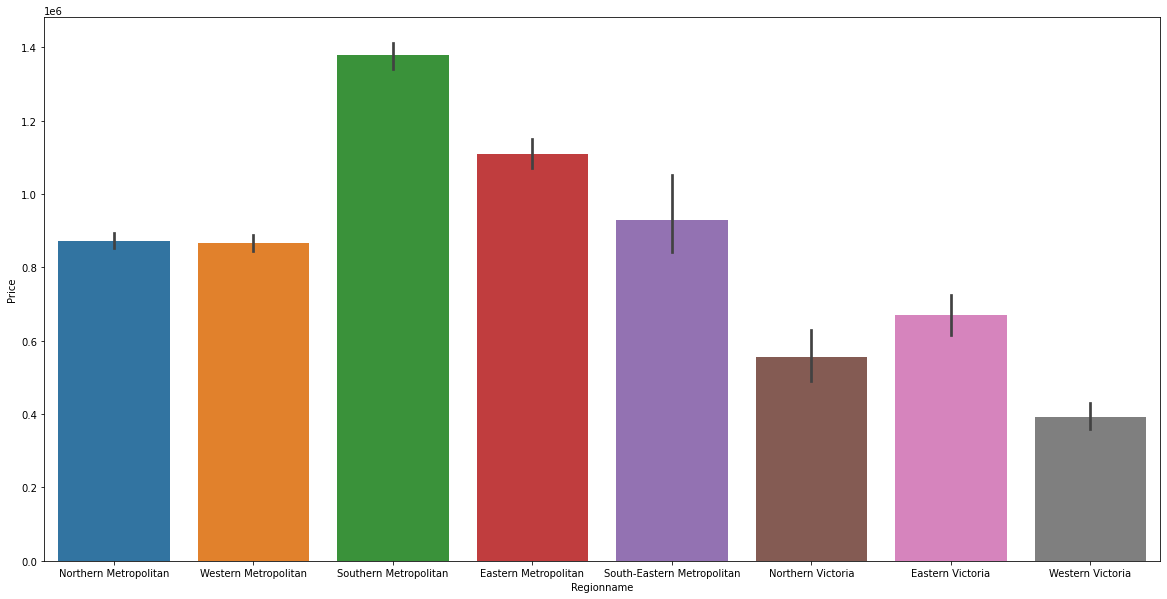

In [149]:
plt.figure(figsize=(20,10))
sns.barplot(x='Regionname',y='Price',data=df)

In [156]:
stats.f_oneway(df[df['Regionname']=='Nothern Metropolitan']['Price'],
                df[df['Regionname']=='Western Metropolitan']['Price'],
                df[df['Regionname']=='Southern Metropolitan']['Price'],
                df[df['Regionname']=='Eastern Metropolitan']['Price'],
                df[df['Regionname']=='South-Eastern Metropolitan']['Price'],
                df[df['Regionname']=='Nothern Victoria']['Price'],
                df[df['Regionname']=='Eastern Victoria']['Price'],
                df[df['Regionname']=='Westen Victoria']['Price'])

# p-value < alpha(0.05) --> setidaknya ada 2 group yang berbeda secara significant, tapi kita tidak bisa menentukan group mana yang berbeda. Biasanya untuk menentukan group mana yang berbeda dilakukan post-hoc test.

# p-value > alpha(0.05) --> tidak ada group yang berbeda secara signifikan

F_onewayResult(statistic=nan, pvalue=nan)

In [ ]:
df[df['Regionname']=='Southern Metropolitan']['Price']